In [127]:
import pandas as pd
# 超参数
COLS_Y = '下期百位是1'
COLS_Y_CLASSNAME = ["不是1", "是1"]
COLS_ALL = ['号码1','号码1奇偶','号码2','号码2奇偶','号码3','号码3奇偶','跨度','和值','下期百位是1']

# 读取excel文件并获取指定列
df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx', usecols=COLS_ALL)
# df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx')
df = df[:300]
print(df)

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\admin\AppData\Local\Temp\ipykernel_38824\2333422779.py:8: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx', usecols=COLS_ALL)


     号码1  号码1奇偶  号码2  号码2奇偶  号码3  号码3奇偶  跨度  和值  下期百位是1
0      8      0    1      1    6      0   7  15       0
1      9      1    5      1    5      1   4  19       0
2      8      0    1      1    3      1   7  12       0
3      2      0    5      1    6      0   4  13       0
4      5      1    3      1    6      0   3  14       0
..   ...    ...  ...    ...  ...    ...  ..  ..     ...
295    3      1    1      1    4      0   3   8       1
296    8      0    5      1    0      0   8  13       0
297    4      0    9      1    8      0   5  21       0
298    5      1    8      0    6      0   3  19       0
299    9      1    8      0    5      1   4  22       0

[300 rows x 9 columns]


In [128]:
from sklearn.model_selection import train_test_split

## 取需要训练的值
cols_x = df.drop(columns=COLS_Y)
cols_y = df[COLS_Y]
cols_x_names = cols_x.columns.tolist()

Xtrain, Xtest, Ytrain, ytest = train_test_split(cols_x,cols_y,test_size=0.3, random_state=105) 

print(Xtrain.shape)
print(Xtest.shape)



(210, 8)
(90, 8)


In [129]:
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score


# 训练模型
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_leaf=4)  #最大{max_depth}层，最少也需要{lefa}个样本才生成分支
clf = clf.fit(Xtrain, Ytrain) 

# 预测测试集
y_pred = clf.predict(Xtest)

# 评估模型
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))


#print('精准度： '+str(clf.score(Xtest, ytest))) #返回预测的准确度
#print([*zip(feature_name,clf.feature_importances_)]) #返回决策树各自变量的重要程度

Accuracy: 0.8777777777777778
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        80
           1       0.00      0.00      0.00        10

    accuracy                           0.88        90
   macro avg       0.44      0.49      0.47        90
weighted avg       0.79      0.88      0.83        90



In [130]:
# K折分层验证
from sklearn.model_selection import StratifiedKFold

# 数据
X = df.drop(columns=COLS_Y).values
y = df[COLS_Y]

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)
# 遍历每个折
for train_index, test_index in skf.split(X, y):
    print(f"train_index:{train_index[:10]}, test_index:{test_index[:10]}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(y_train.shape)
    print(y_test.shape)
    # 训练模型
    clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=4)  #最大{max_depth}层，最少也需要{lefa}个样本才生成分支
    clf.fit(X_train, y_train)

    # 预测测试集
    y_pred = clf.predict(Xtest)

    # 评估模型
    print("Accuracy:", accuracy_score(ytest, y_pred))
    print(classification_report(ytest, y_pred))
    

train_index:[ 0  2  3  5  6  8  9 10 13 14], test_index:[ 1  4  7 11 12 16 18 19 26 27]
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        80
           1       0.00      0.00      0.00        10

    accuracy                           0.89        90
   macro avg       0.44      0.50      0.47        90
weighted avg       0.79      0.89      0.84        90

train_index:[ 1  2  3  4  6  7  8 11 12 16], test_index:[ 0  5  9 10 13 14 15 21 23 25]
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        80
           1       1.00      0.10      0.18        10

    accuracy                           0.90        90
   macro avg       0.95      0.55      0.56        90
weighted avg       0.91      0.90      0.86        90

train_index:[ 0  1  4  5  7  9 10 11 12 13], test_index:[ 2  3  6  8 17 20 22 24 28 34]
Accuracy: 0.8555555555555555
          

d:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
d:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

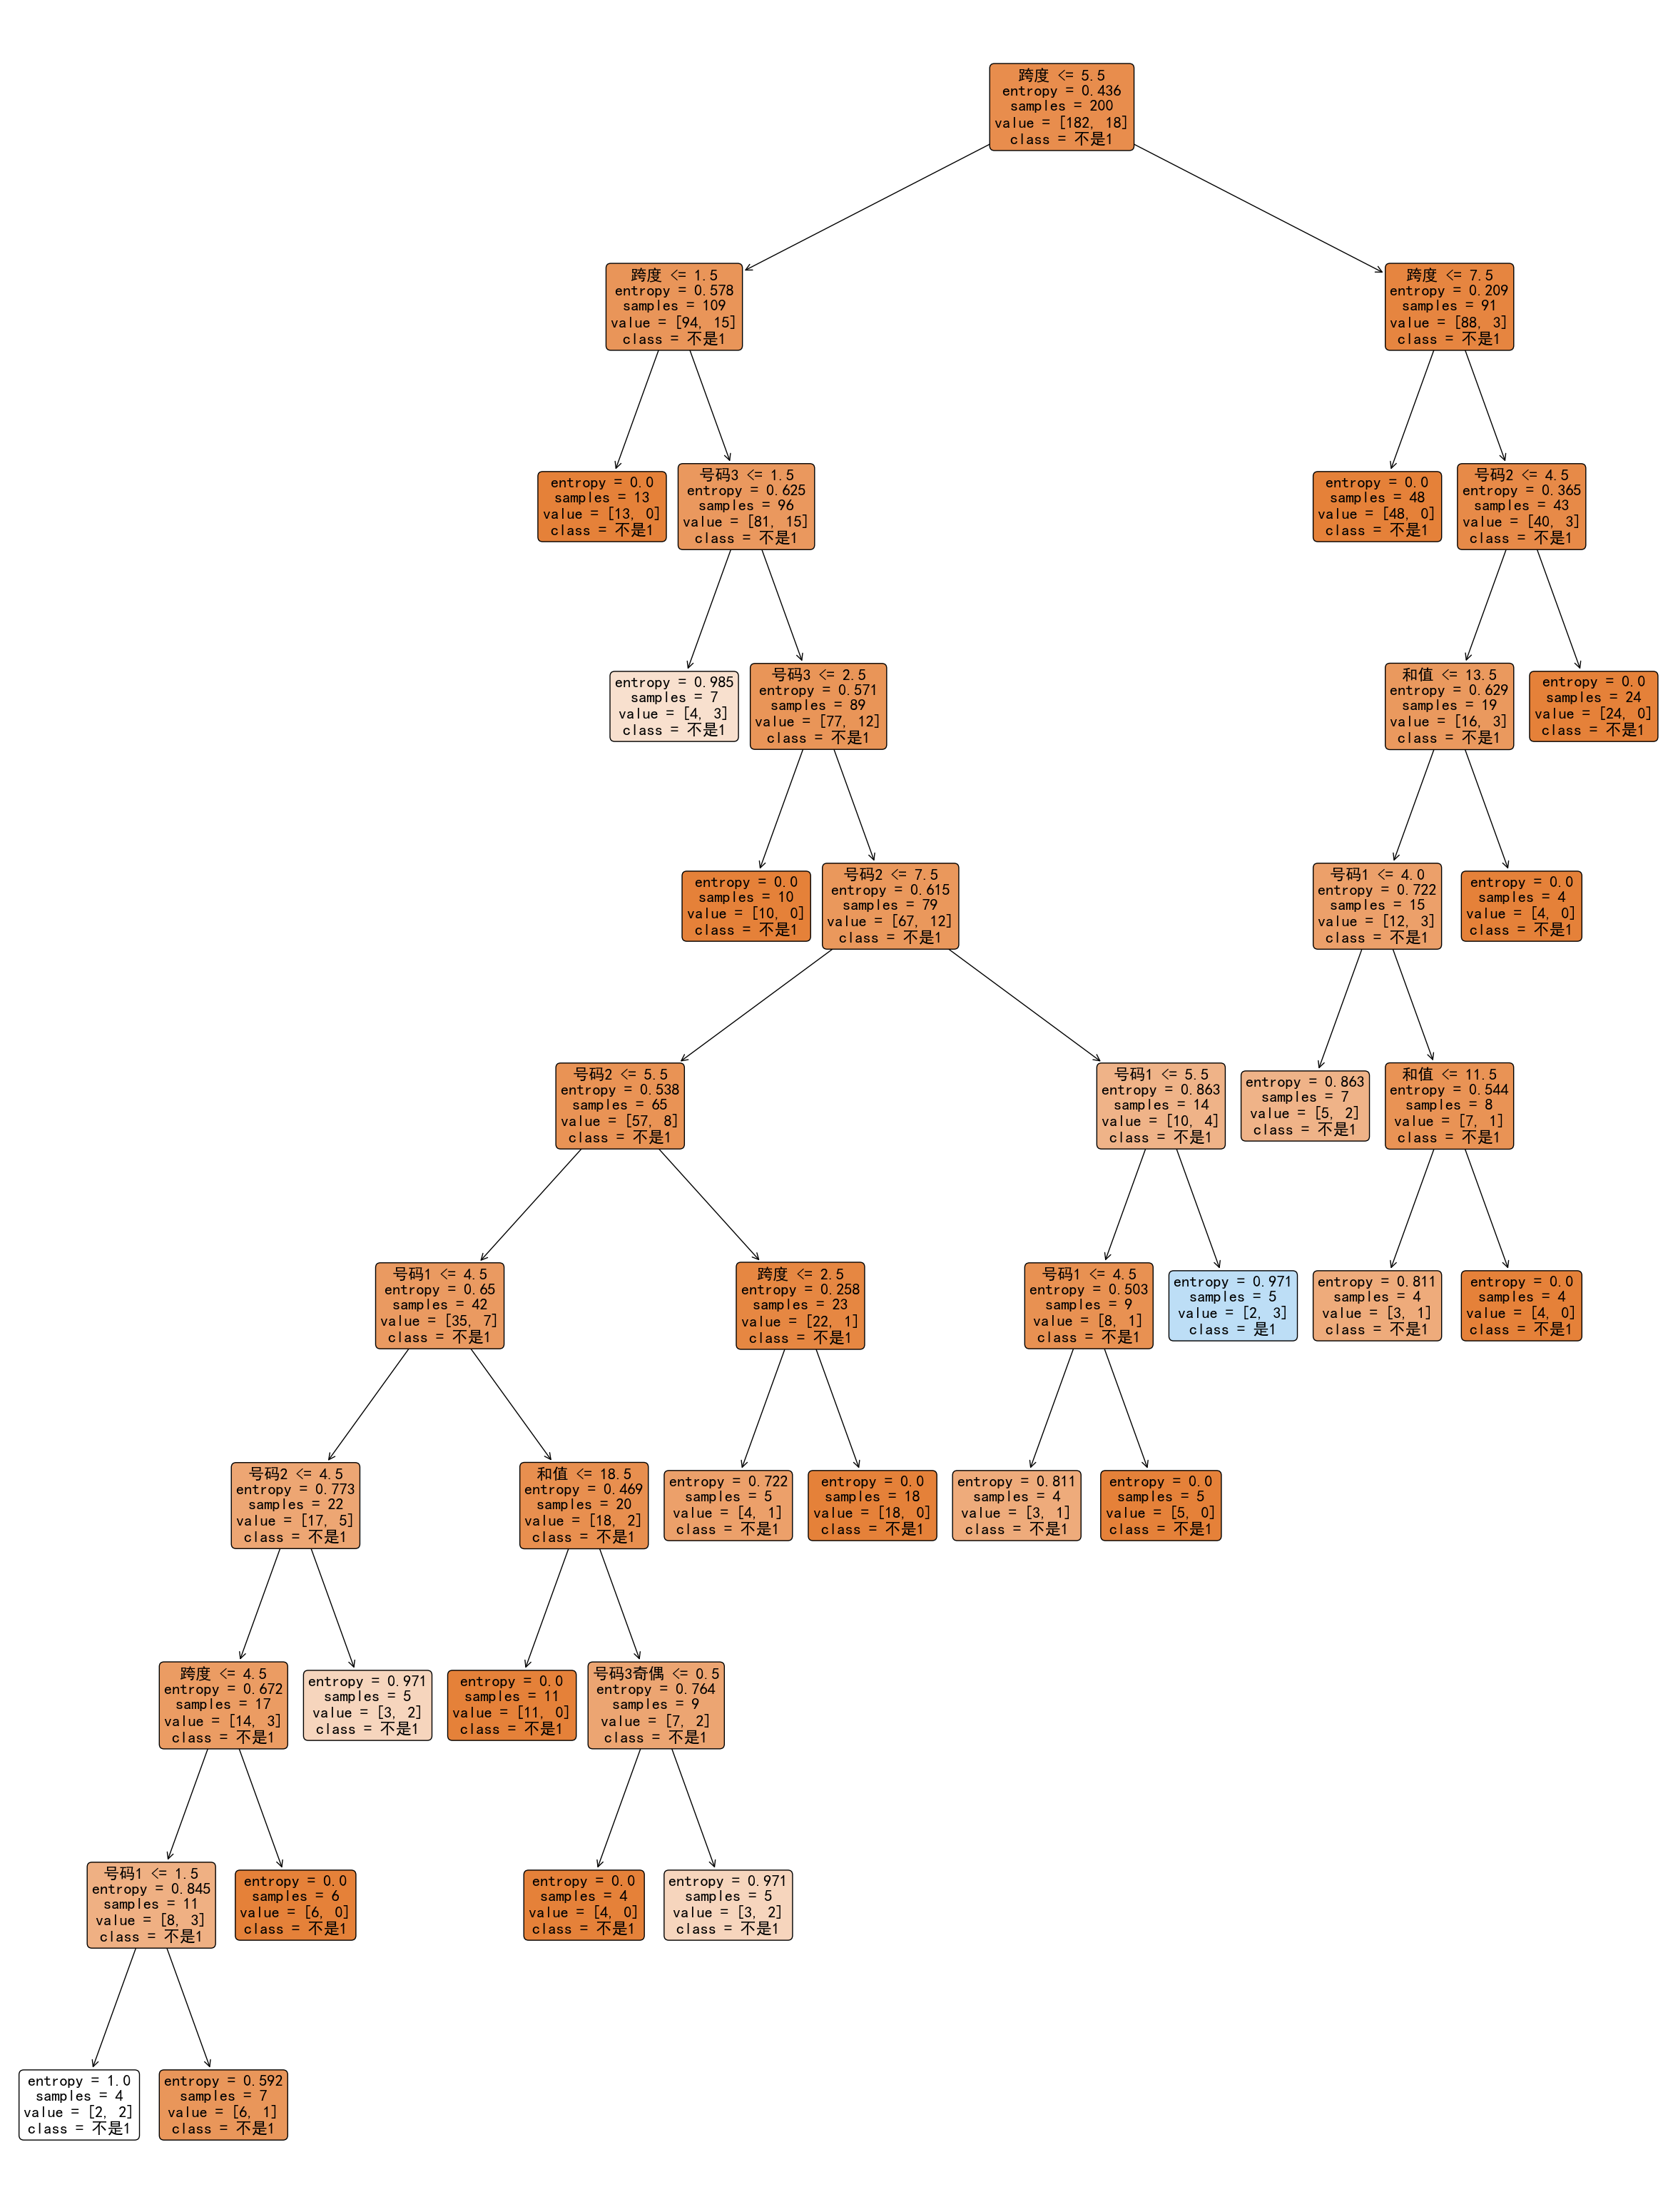

Ytrain unique: [0 1]


In [131]:
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(30,40)) #画布大小，要大一点防止画不下
a = tree.plot_tree(clf,
                   feature_names = cols_x_names,
                   #class_names=COLS_Y_CLASSNAME, 
                   class_names=COLS_Y_CLASSNAME, 
                   rounded = True,
                   filled = True,
                   fontsize=16)

plt.show()  
print("Ytrain unique:", Ytrain.unique())

